In [1]:
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
from os import listdir, makedirs, getcwd, remove
print(os.listdir("../input"))

# Import packages
import time, copy
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import datasets, models, transforms
from torchvision.utils import make_grid
from torchvision.models.vgg import model_urls
from torch.utils.data import Dataset, DataLoader, random_split
from torch.utils.data.sampler import SubsetRandomSampler

from os.path import isfile, join, abspath, exists, isdir, expanduser

# Any results you write to the current directory are saved as output.

['fork-of-fork-of-object-detection-train-val', 'nfork-of-object-detection-train-val', 'fork-of-fork-of-object-detection-t', 'fork-of-new-fork-of-fork-of-object-detection-train', 'iwildcam-2019-fgvc6', 'fork-of-object-detection-t', 'vgg16']


In [2]:
!ls ../input/fork-of-object-detection-t

__notebook__.ipynb  __results__.html  o_test_set.zip
__output__.json     custom.css	      test_df_neww.pkl


In [3]:
class_names = ['empty', 'deer', 'moose', 'squirrel', 'rodent', 'small_mammal', 'elk', 'pronghorn_antelope', 
               'rabbit', 'bighorn_sheep', 'fox', 'coyote', 'black_bear', 'raccoon', 'skunk', 'wolf', 
               'bobcat', 'cat', 'dog', 'opossum', 'bison', 'mountain_goat', 'mountain_lion']

In [4]:
import pickle

# Split into train_df and val_df
with open('../input/nfork-of-object-detection-train-val/train_df_tt.pkl', 'rb') as f:
    train_df = pickle.load(f)
with open('../input/nfork-of-object-detection-train-val/val_df_tt.pkl', 'rb') as f:
    val_df = pickle.load(f)
with open('../input/fork-of-fork-of-object-detection-t/test_df_neww.pkl', 'rb') as f:
    test_df = pickle.load(f)

In [5]:
import zipfile

train_path = '../created/nfork-of-object-detection-train-val/o_train_set'
#os.makedirs(train_path)
zFile = zipfile.ZipFile('../input/nfork-of-object-detection-train-val/o_train_set.zip', 'r')
    #ZipFile.namelist(): 获取ZIP文档内所有文件的名称列表
for fileM in zFile.namelist(): 
    zFile.extract(fileM, train_path)
zFile.close();

In [6]:
val_path = '../created/nfork-of-object-detection-train-val/o_val_set'
os.makedirs(val_path)
zFile = zipfile.ZipFile('../input/nfork-of-object-detection-train-val/o_val_set.zip', 'r')
#ZipFile.namelist(): 获取ZIP文档内所有文件的名称列表
for fileM in zFile.namelist(): 
    zFile.extract(fileM, val_path)
zFile.close();

In [7]:
test_path = '../created/fork-of-fork-of-object-detection-t/o_test_set'
os.makedirs(test_path)
zFile = zipfile.ZipFile('../input/fork-of-fork-of-object-detection-t/o_test_set.zip', "r")
#ZipFile.namelist(): 获取ZIP文档内所有文件的名称列表
for fileM in zFile.namelist(): 
    zFile.extract(fileM, test_path)
zFile.close();

In [8]:
train_data_dir = train_path
val_data_dir = val_path
test_data_dir = test_path

In [9]:
train_df

,category_id,date_captured,file_name,frame_num,id,location,rights_holder
60,0,2012-01-11 14:03:00,5976a3d9-23d2-11e8-a6a3-ec086b02610b.jpg,1,5976a3d9-23d2-11e8-a6a3-ec086b02610b,36,Erin Boydston
72,17,2012-04-08 17:53:09,589e6828-23d2-11e8-a6a3-ec086b02610b.jpg,2,589e6828-23d2-11e8-a6a3-ec086b02610b,88,Justin Brown
77,19,2011-07-28 21:34:12,5a296508-23d2-11e8-a6a3-ec086b02610b.jpg,3,5a296508-23d2-11e8-a6a3-ec086b02610b,38,Justin Brown
110,11,2011-09-17 03:49:00,5862950e-23d2-11e8-a6a3-ec086b02610b.jpg,1,5862950e-23d2-11e8-a6a3-ec086b02610b,120,Erin Boydston
118,1,2014-09-26 02:14:06,597b4894-23d2-11e8-a6a3-ec086b02610b.jpg,3,597b4894-23d2-11e8-a6a3-ec086b02610b,25,Justin Brown
132,17,2012-03-15 07:10:53,58b2f0e1-23d2-11e8-a6a3-ec086b02610b.jpg,2,58b2f0e1-23d2-11e8-a6a3-ec086b02610b,88,Justin Brown
177,18,2012-01-17 10:44:15,5913652b-23d2-11e8-a6a3-ec086b02610b.jpg,2,5913652b-23d2-11e8-a6a3-ec086b02610b,105,Justin Brown
182,1,2015-02-20 19:31:44,599d7c2b-23d2-11e8-a6a3-ec086b02610b.jpg,3,599d7c2b-23d2-11e8-a6a3-ec086b02610b,25,Justin Brown
185,11,2011-05-30 02:35:00,590ebc38-23d2-11e8-a6a3-ec086b02610b.jpg,1,590ebc38-23d2-11e8-a6a3-ec086b02610b,120,Erin Boydston
187,13,2012-04-13 20:35:30,5935a851-23d2-11e8-a6a3-ec086b02610b.jpg,3,5935a851-23d2-11e8-a6a3-ec086b02610b,115,Justin Brown


In [10]:
#pd.DataFrame(train_df['category'].value_counts()).transpose()

In [11]:
#pd.DataFrame(val_df['category'].value_counts()).transpose()

In [12]:
# Arrange the dataset in pytorch ImageFolder way
class IWildCamDataset(Dataset):
    
    def __init__(self, df, root_dir, transform=None):
        """
        Args:
            df (pandas.DataFrame): Contains basic information.
            root_dir (string): The path where image data is saved.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.df = df
        self.root_dir = root_dir
        self.transform = transform
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.root_dir,
                                self.df.iloc[idx].file_name)
        with open(img_path, 'rb') as f:
            image = Image.open(f)
            image = image.convert('RGB')
        
        if('category_id' in self.df.iloc[idx]):
            category = self.df.iloc[idx].category_id
        else:
            # In test set, there is no given category. Here we will not return the category,
            # return the img_id instead. (Because we need to keep track of the img id during
            # testing)
            category = self.df.iloc[idx].id
        #if('file_name' in self.df.iloc[idx]):
         #   filename = self.df.iloc[idx].file_name

        # Transform
        if self.transform:
            image = self.transform(image)

        return image, category

In [13]:
data_transforms = transforms.Compose([
    transforms.Resize(256),  # 1. Resize smallest side to 256.
     transforms.CenterCrop(224), # 2. Crop the center 224x224 pixels.
     transforms.ToTensor(), # 3. Convert to pytorch tensor.
     transforms.Normalize(mean = [0.485, 0.456, 0.406],  # normalize.
                          std = [0.229, 0.224, 0.225])
])

# Get dataset
train_set = IWildCamDataset(train_df, train_data_dir, transform=data_transforms)
val_set   = IWildCamDataset(val_df, val_data_dir, transform=data_transforms)
test_set  = IWildCamDataset(test_df, test_data_dir, transform=data_transforms)


In [14]:
def show_img(input_img, title):
    img = input_img.clone()
    # undo img transformations.
    img = img.squeeze() # get rid of batch dim.
    # un-normalize pixel values.
    for t, m, s in zip(img, [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]):
        t.mul_(s).add_(m)
    plt.title(title)
    plt.imshow(img.transpose(0,2).transpose(0,1)); 
    plt.grid(False); plt.axis('off');

In [15]:
len(test_set)

40664

In [16]:
test_set[200][0].shape

torch.Size([3, 224, 224])

In [17]:
# Load a pretrained model
model_ft = models.vgg16()
model_ft.load_state_dict(torch.load('../input/vgg16/vgg16.pth'))

# Freeze all the network except the final layer
for param in model_ft.parameters():
    param.requires_grad = False

# Alter the Linear layer for our classification problem

model_ft.classifier[-1] = nn.Linear(in_features=4096, out_features=len(class_names))
#num_ftrs = model_ft.classifier.in_features
#model_ft.classifier = nn.Linear(num_ftrs, len(class_names))

In [18]:
def train_model(model, loss_fn, batchSize, trainset, valset, optimizer, num_epochs=5, num_workers=4):
  
    # Shuffling is needed in case dataset is not shuffled by default.
    train_loader = torch.utils.data.DataLoader(dataset = trainset,
                                               batch_size = batchSize,
                                               num_workers = num_workers,
                                               shuffle = True)
    # We don't need to bach the validation set but let's do it anyway.
    val_loader = torch.utils.data.DataLoader(dataset = valset,
                                             batch_size = batchSize,
                                             num_workers = num_workers,
                                             shuffle = False) # No need.

    # log accuracies and losses.
    train_accuracies = []; val_accuracies = []
    train_losses = []; val_losses = []

    # GPU enabling.
    model = model.cuda()
    loss_fn = loss_fn.cuda()
    
    # Save the initial model weights
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    # Training loop. 
    for epoch in range(0, num_epochs):
        correct = 0.0
        cum_loss = 0.0

        # Make a pass over the training data.
        model.train()
        for (i, (inputs, labels)) in enumerate(train_loader):
            
            inputs = inputs.cuda()
            #print(inputs.shape)
            labels = labels.cuda()

            # Forward pass. (Prediction stage)
            scores = model(inputs)
            loss = loss_fn(scores, labels)

            # Count how many correct in this batch.
            max_scores, max_labels = scores.max(1)
            correct += (max_labels == labels).sum().item()
            cum_loss += loss.item()

            # Zero the gradients in the network.
            optimizer.zero_grad()

            # Backward pass. (Gradient computation stage)
            loss.backward()
            
            # Parameter updates (SGD step)
            optimizer.step()

            # Logging the current results on training.
            if (i + 1) % 100 == 0:
                print('Train-epoch %d. Iteration %05d, Avg-Loss: %.4f, Accuracy: %.4f' % 
                    (epoch, i + 1, cum_loss / (i + 1), correct / ((i + 1) * batchSize)))

        train_accuracies.append(correct / len(trainset))
        train_losses.append(cum_loss / (i + 1))   

        # Make a pass over the validation data.
        correct = 0.0
        cum_loss = 0.0
        model.eval()
        for (i, (inputs, labels)) in enumerate(val_loader):
            inputs = inputs.cuda()
            labels = labels.cuda()
            

            # Forward pass. (Prediction stage)
            scores = model(inputs)
            cum_loss += loss_fn(scores, labels).item()

            # Count how many correct in this batch.
            max_scores, max_labels = scores.max(1)
            correct += (max_labels == labels).sum().item()

        val_accuracies.append(correct / len(valset))
        val_losses.append(cum_loss / (i + 1))
        
         # We should keep saving the best model: deep copy the model
        if (correct / len(valset)) > best_acc:
            best_acc = (correct / len(valset))
            best_model_wts = copy.deepcopy(model.state_dict())

        # Logging the current results on validation.
        print('Validation-epoch %d. Avg-Loss: %.4f, Accuracy: %.4f' % 
            (epoch, cum_loss / (i + 1), correct / len(valset)))
    
    # Before return, we should set the model with the best model weights
    model.load_state_dict(best_model_wts)
    
    # Plot the losses & accuracies
    x = range(num_epochs)
    
    plt.figure()
    plt.plot(x, train_accuracies)
    plt.plot(x, val_accuracies)
    plt.title('Accuracy')
    plt.legend(['train_accuracy', 'val_accuracy'])
    
    plt.figure()
    plt.plot(x, train_losses)
    plt.plot(x, val_losses)
    plt.title('Loss')
    plt.legend(['train_loss', 'val_loss'])

Validation-epoch 0. Avg-Loss: 1.4961, Accuracy: 0.5913
Validation-epoch 1. Avg-Loss: 1.1318, Accuracy: 0.6696
Validation-epoch 2. Avg-Loss: 0.9797, Accuracy: 0.7304
Validation-epoch 3. Avg-Loss: 0.9000, Accuracy: 0.7449
Validation-epoch 4. Avg-Loss: 0.8524, Accuracy: 0.7565
Validation-epoch 5. Avg-Loss: 0.8312, Accuracy: 0.7536
Validation-epoch 6. Avg-Loss: 0.8152, Accuracy: 0.7623
Validation-epoch 7. Avg-Loss: 0.7860, Accuracy: 0.7768
Validation-epoch 8. Avg-Loss: 0.7877, Accuracy: 0.7739
Validation-epoch 9. Avg-Loss: 0.7756, Accuracy: 0.7710
Validation-epoch 10. Avg-Loss: 0.7529, Accuracy: 0.7884
Validation-epoch 11. Avg-Loss: 0.7478, Accuracy: 0.7710
Validation-epoch 12. Avg-Loss: 0.7439, Accuracy: 0.7797
Validation-epoch 13. Avg-Loss: 0.7344, Accuracy: 0.7884
Validation-epoch 14. Avg-Loss: 0.7296, Accuracy: 0.7855
Validation-epoch 15. Avg-Loss: 0.7189, Accuracy: 0.7942
Validation-epoch 16. Avg-Loss: 0.7182, Accuracy: 0.7884
Validation-epoch 17. Avg-Loss: 0.7098, Accuracy: 0.7884
Va

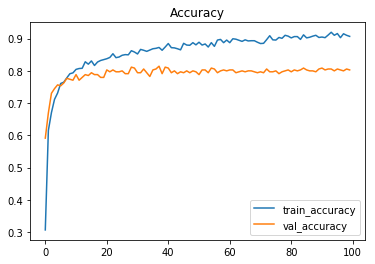

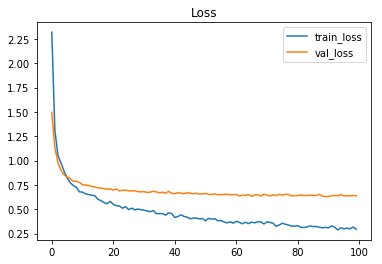

In [19]:
batchSize = 70
loss_fn = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.00085, momentum=0.95)

# Train model
train_model(model_ft, loss_fn, batchSize, train_set, val_set, optimizer_ft, num_epochs=100)


In [20]:
# Function we used during model evaluation.
def eval_predict(model, val_set, batchSize, num_workers=4):
    val_loader = torch.utils.data.DataLoader(dataset = val_set,
                                             batch_size = batchSize,
                                             num_workers = num_workers,
                                             shuffle = False)
    
    input_list = []
    label_list = []
    score_list = []
    
    model = model.cuda()
    model.eval()
    for (i, (inputs, labels)) in enumerate(val_loader):
        inputs = inputs.cuda()

        # Forward pass. (Prediction stage)
        scores = model(inputs)
        
        for (input, label, score) in zip(inputs, labels, scores):
            input_list.append(input.cpu())
            label_list.append(label.item())
            score_list.append(score.cpu())

        if (i + 1) % 100 == 0:
            print('Predicted %06d images' % (i * batchSize + len(ids)) )
    
    return input_list, label_list, score_list

In [21]:
# Predict on the validation set.
input_list, label_list, score_list = eval_predict(model_ft, val_set, 100)

In [22]:
# Get the predicted labels list.
pred_list = [score.max(0)[1].item() for score in score_list]

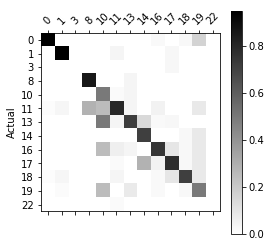

In [23]:
df_confusion = pd.crosstab(pd.Series(label_list, name='Actual'), pd.Series(pred_list, name='Predicted'))
df_conf_norm = df_confusion/ df_confusion.sum(axis=1)
import matplotlib.pyplot as plt
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_conf_norm)

In [24]:
def predict(model, test_set, batchSize, num_workers=4):
    test_loader = torch.utils.data.DataLoader(dataset = test_set,
                                             batch_size = batchSize,
                                             num_workers = num_workers,
                                             shuffle = False)
    
    submission = []
    
    model = model.cuda()
    model.eval()
    for (i, (inputs, ids)) in enumerate(test_loader):
        inputs = inputs.cuda()

        # Forward pass. (Prediction stage)
        scores = model(inputs)
        
        # Get predictions.
        _, max_labels = scores.max(1)
        
        # Add all the id & output into submission list
        for (id, max_label) in zip(ids, max_labels):
            submission.append({'Id':id, 'Predicted': max_label.item()})
        
        if (i + 1) % 100 == 0:
            print('Predicted %06d images' % (i * batchSize + len(ids)) )
    
    return pd.DataFrame(submission)

In [25]:
batchSize = 100

submission_df = predict(model_ft, test_set, batchSize)

Predicted 010000 images
Predicted 020000 images
Predicted 030000 images
Predicted 040000 images


In [27]:
submission_df.to_csv('submission.csv',index=False)